<p style="font-family: Arial; font-size:2.00em;color:#2462C0; font-style:bold"><br>

Import Libraries
</p>

In [1]:
import pandas as pd
import numpy as np
import math
import datetime
import arrow
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<p style="font-family: Arial; font-size:2.00em;color:#2462C0; font-style:bold">
Using Pandas to Read the Dataset<br>
</p>
<br>
Loading the two CSV files:
* **train.csv :** *DBA*, *BORO*, *BUILDING*, *STREET*, *ZIPCODE*, *PHONE*, *CUISINE DESCRIPTION*, *INSPECTION DATE*, *ACTION*, *SCORE*, *GRADE*, *GRADE DATE*, *RECORD DATE*, *INSPECTION NO.*, *INSPECTION_TYPE*, *CRITICAL FLAG*, *CAMIS*
* **test.csv :** *DBA*, *BORO*, *BUILDING*, *STREET*, *ZIPCODE*, *PHONE*, *CUISINE DESCRIPTION*, *INSPECTION DATE*, *ACTION*, *SCORE*, *GRADE*, *GRADE DATE*, *RECORD DATE*, *INSPECTION NO.*, *INSPECTION_TYPE*, *CAMIS* <br>



In [2]:
raw_data = pd.read_csv('./train.csv')
raw_data_test = pd.read_csv('./test.csv')

#To check the total number of rows in each column and its data type
print (raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215955 entries, 0 to 215954
Data columns (total 17 columns):
DBA                    215763 non-null object
BORO                   215955 non-null object
BUILDING               215890 non-null object
STREET                 215949 non-null object
ZIPCODE                215949 non-null float64
PHONE                  215951 non-null object
CUISINE DESCRIPTION    215955 non-null object
INSPECTION DATE        215955 non-null object
ACTION                 215342 non-null object
SCORE                  203548 non-null float64
GRADE                  105650 non-null object
GRADE DATE             104257 non-null object
RECORD DATE            215955 non-null object
INSPECTION NO.         215342 non-null object
INSPECTION_TYPE        215955 non-null object
CRITICAL FLAG          215955 non-null object
CAMIS                  215955 non-null int64
dtypes: float64(2), int64(1), object(14)
memory usage: 28.0+ MB
None


<p style="font-family: Arial; font-size:2.00em;color:#2462C0; font-style:bold">
Printing the first five rows of the training dataset<br>
</p>
<br>

In [3]:
raw_data_test.head()

,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION NO.,INSPECTION_TYPE,CAMIS
0,ROCKIN' RAW,MANHATTAN,171,SULLIVAN STREET,10012.0,2124773777,Vegetarian,5/7/2015,Violations were cited in the following area(s).,7.0,NaN,NaN,8/28/2017,Initial Inspection,Cycle Inspection,35773502
1,HONG KONG RESTAURANT,QUEENS,10259,JAMAICA AVENUE,11418.0,7188463300,Chinese,1/22/2015,Violations were cited in the following area(s).,10.0,A,1/22/2015,8/28/2017,Initial Inspection,Cycle Inspection,92746946
2,UNCLE VANYA,MANHATTAN,315,WEST 54 STREET,10019.0,2122620542,Russian,12/7/2015,Violations were cited in the following area(s).,14.0,NaN,NaN,8/28/2017,Initial Inspection,Cycle Inspection,28205432
3,GABRIEL KREUTHER,MANHATTAN,37,W 42ND ST,10036.0,2122575826,French,7/21/2015,Violations were cited in the following area(s).,9.0,A,7/21/2015,8/28/2017,Initial Inspection,Pre-permit (Operational),53192030
4,CHIFA RESTAURANT,QUEENS,7320,NORTHERN BOULEVARD,11372.0,7188980108,Peruvian,2/7/2017,Violations were cited in the following area(s).,16.0,NaN,NaN,8/28/2017,Initial Inspection,Cycle Inspection,79547153


<p style="font-family: Arial; font-size:2.0em;color:#2462C0; font-style:bold"><br>

Feature Selection
</p>

**The "SCORE" column is used as a feature to train the dataset and the NaN values are replaced with the mean of the score column**

In [4]:
def get_score_feature(score): 
    #For checking the NaN values and storing them as 0
    score = [0.0 if math.isnan(x) else x for x in score]
    sum=0.0
    
    for x in score:
        sum = sum+x
        mean = sum/len(score) #Finding the mean of the entire column
    score=[mean if x==0.0 else x for x in score] #Updating the previously NaN values (now 0.0) with the mean 
    
    score_feature = np.array(score) 
    #Creating the column vector of the feature 
    score_feature = score_feature.reshape(score_feature.shape[0],1)
    return score_feature
    

**The "GRADE" column is used as a feature to train the dataset and the NaN values are replaced with 0 and the "Not Yet Graded" fields are stored as -1**

In [5]:
def get_grade_feature(grade):
    for i in range(0,len(grade)):
        if type(grade[i])==float: #For checking the NaN values and storing them as 0
             grade[i]=0
        elif grade[i] =='Not Yet Graded': #For checking the 'Not Yet Graded' values and storing them as -1
            grade[i]=-1
        else:
            grade[i] = ord(grade[i])-64 #To find the grade of the alphabet and storing it as a number (65 is the ASCII value of 'A')
    
    grade_feature = np.array(grade)
    grade_feature = grade_feature.reshape(grade_feature.shape[0],1)        
    return grade_feature


**The "ACTION" column is used as a feature to train the dataset and every unique action is stored with a specific index**

In [6]:
def get_action_feature(action):
    s = action
    mydict={} #Empty dictionary that stores index of every unique action
    i = 0
    
    for item in s:
        if(i>0 and item in mydict):
            continue
        else:    
            i = i+1
            mydict[item] = i

    k=[]
    for item in s:
        k.append(mydict[item]) #The unique index is stored in a list 'k'
    
    action_feature = np.array(k)
    action_feature = action_feature.reshape(action_feature.shape[0],1)        
    return action_feature

**The "BORO" column is used as a feature to train the dataset and every unique borough is stored with a specific index**

In [7]:
def get_boro_feature(borough):
    s = borough
    mydict={} #Empty dictionary that stores index of every unique boro
    i = 0
    for item in s:
        if(i>0 and item in mydict):
            continue
        else:    
            i = i+1
            mydict[item] = i

    k=[]
    for item in s:
        k.append(mydict[item]) #The unique index is stored in a list 'k'
    
    borough_feature = np.array(k)      
    borough_feature = borough_feature.reshape(borough_feature.shape[0],1)  
    return borough_feature

**The "INSPECTION_TYPE" column is used as a feature to train the dataset and every unique inspection type is stored with a specific index**

In [8]:
def get_inspection_type_feature(inspection):
    s = inspection
    mydict={} #Empty dictionary that stores index of every unique inspection type
    i = 0
    for item in s:
        if(i>0 and item in mydict):
            continue
        else:    
           i = i+1
           mydict[item] = i

    k=[]
    for item in s:
        k.append(mydict[item])  #The unique index is stored in a list 'k'
    
    inspection_type_feature = np.array(k)
    inspection_type_feature = inspection_type_feature.reshape(inspection_type_feature.shape[0],1)        
    return inspection_type_feature
    

**The "INSPECTION NO." column is used as a feature to train the dataset and every unique inspection no. is stored with a specific index**

In [9]:
def get_inspection_no_feature(inspection):
    s = inspection
    mydict={} #Empty dictionary that stores index of every unique inspection no.
    i = 0
    for item in s:
        if(i>0 and item in mydict):
            continue
        else:    
           i = i+1
           mydict[item] = i

    k=[]
    for item in s:
        k.append(mydict[item])  #The unique index is stored in a list 'k'
    
    inspection_no_feature = np.array(k)
    inspection_no_feature = inspection_no_feature.reshape(inspection_no_feature.shape[0],1)        
    return inspection_no_feature

**The difference in "RECORD DATE" and "GRADE DATE"(if given) otherwise the difference in "RECORD DATE" and "INSPECTION DATE" is used as a feature to train the dataset**

In [10]:
def get_date_diff_feature(insp_date, gra_date, rec_date ):
   
    diff_in_days = [] #list to store the difference in dates in terms of number of days present in the interim period
    
    for i in range(0,len(insp_date)):
        if type(gra_date[i])==float: #Checking if the grade dates are NaN
            gra_date[i]=insp_date[i] #If yes, then grade date for those values shall be stored with the inspection date (as "INSPECTION DATE" column has zero NaN values)
        
        a = arrow.get(insp_date[i]).date() #To convert the inspection dates into datetime module
        b = arrow.get(gra_date[i]).date()#To convert the grade dates into datetime module
        c = arrow.get(rec_date[i]).date() #To convert the record dates into datetime module
      
        if(c-a>=c-b): #To check the difference between the record date and grade date with the record date and inspecton date
            diff_in_days.append(((c-b).days)//365)#Performing integer division to get the number of years lapsed in between the "RECORD DATE" and the "GRADE DATE" and storing in a list
        else:
            diff_in_days.append(((c-a).days)//365)#Performing integer division to get the number of years lapsed in between the "RECORD DATE" and the "INSPECTION DATE" and storing in a list
    date_diff_feature = np.array(diff_in_days)
    date_diff_feature = date_diff_feature.reshape(date_diff_feature.shape[0],1) 
    return date_diff_feature

<p style="font-family: Arial; font-size:2.00em;color:#2462C0; font-style:bold"><br>

Creating Feature Vectors
</p>

In [11]:
from sklearn.model_selection import train_test_split

#Passing the column records to the respective methods defined above
score_feature = get_score_feature(raw_data['SCORE'].tolist()) 
grade_feature = get_grade_feature(raw_data['GRADE'].tolist())
action_feature = get_action_feature(raw_data['ACTION'].tolist())
boro_feature = get_boro_feature(raw_data['BORO'].tolist())
inspection_type_feature = get_inspection_type_feature(raw_data['INSPECTION_TYPE'].tolist())
inspection_no_feature = get_inspection_no_feature(raw_data['INSPECTION NO.'].tolist())
ins_date = raw_data['INSPECTION DATE'].tolist()
grade_date = raw_data['GRADE DATE'].tolist()
record_date = raw_data['RECORD DATE'].tolist()
date_diff_feature = get_date_diff_feature(ins_date,grade_date,record_date)

In [12]:
#Training data to store the "CRITICAL FLAG" in our training output
training_output = raw_data['CRITICAL FLAG'].tolist()

#Creating a column stack to store all the features columnwise of our training input
training_input = score_feature
training_input = np.column_stack((training_input,grade_feature))
training_input = np.column_stack((training_input,action_feature))
training_input = np.column_stack((training_input,boro_feature))
training_input = np.column_stack((training_input,inspection_type_feature))
training_input = np.column_stack((training_input,inspection_no_feature))
training_input = np.column_stack((training_input,date_diff_feature))

In [13]:
#Splitting the training data to test our machine learning model on our splitted training data (0.25 of our training data)
X_train, X_test, y_train, y_test = train_test_split( training_input, training_output, test_size=0.25, random_state=24)

In [14]:
print(X_train.shape)
print(len(y_train))

(161966, 7)
161966


<p style="font-family: Arial; font-size:2.25em;color:#2462C0; font-style:bold"><br>

Choosing classifiers
</p>

In [15]:
#Importing the necessary libraries for our classifiers

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>

K Nearest Neighbour Classifier
</p>

In [16]:
#Using K Nearest Neighbour classifier
clf_knn = KNeighborsClassifier(n_neighbors=20) #Optimum value of n_neighbors to prevent the fluctuation in future prediction
clf_knn.fit(X_train,y_train) #Fitting our splitted training data into our ML model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [17]:
knn_y = clf_knn.predict(X_test) #Predicting our test training data

In [18]:
knn_acc=accuracy_score(y_test,knn_y) #Checking the accuracy of our ML model
print('KNN Accuracy:',knn_acc)

KNN Accuracy: 0.639815517976


In [19]:
print('KNN Classification Report')
print()
print(classification_report(y_test,knn_y)) #Printing the classification report to check the precision and recall values

KNN Classification Report

                precision    recall  f1-score   support

      Critical       0.63      0.86      0.73     29706
Not Applicable       0.93      0.92      0.93       912
  Not Critical       0.66      0.35      0.46     23371

   avg / total       0.65      0.64      0.61     53989



In [20]:
print('Confusion matrix for KNN Classifier: ')
print()
labels = ['Critical', 'Not Critical', 'Not Applicable']
cm = confusion_matrix(y_test,knn_y, labels) #Finding the confusion matrix for a better idea of our predictions on our tested training data
print(cm) 

Confusion matrix for KNN Classifier: 

[[25583  4114     9]
 [15197  8117    57]
 [   52    17   843]]


[Text(0,0.5,'Critical'),
 Text(0,1.5,'Not Critical'),
 Text(0,2.5,'Not Applicable')]

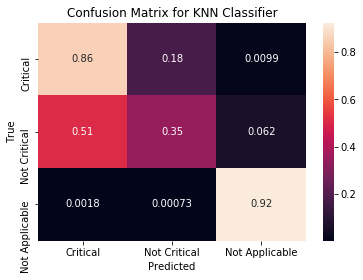

In [21]:
#Plotting the Confusion matrix

normal = cm / cm.astype(np.float).sum(axis=1) #Normalizing our Confusion Matrix as there are a wide range of values
ax= plt.subplot()
#Creating a heatmap using seaborn
sns.heatmap(normal, annot=True, ax = ax) #annot=True to annotate cells

#Setting labels, title and ticks
ax.set_xlabel('Predicted') #Axis label along X axis
ax.set_ylabel('True') #Axis label along Y axis
ax.set_title('Confusion Matrix for KNN Classifier') 
ax.xaxis.set_ticklabels(labels) #Setting the sub-labels along X axis
ax.yaxis.set_ticklabels(labels) #Setting the sub-labels along Y axis

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>

Decision Tree Classifier
</p>

In [22]:
#Using Decision Tree Classifier
clf_dt = DecisionTreeClassifier() 
clf_dt.fit(X_train,y_train) #Fitting our splitted training data into our ML model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
dt_y = clf_dt.predict(X_test) #Predicting our test training data

In [24]:
dt_acc=accuracy_score(y_test,dt_y) #Checking the accuracy of our ML model
print('Decision Tree Accuracy:',dt_acc)

Decision Tree Accuracy: 0.64761340273


In [25]:
print('Decision Tree Classification Report ')
print()
print(classification_report(y_test,dt_y)) #Printing the classification report to check the precision and recall values

Decision Tree Classification Report 

                precision    recall  f1-score   support

      Critical       0.63      0.86      0.73     29706
Not Applicable       0.96      0.93      0.94       912
  Not Critical       0.67      0.36      0.47     23371

   avg / total       0.66      0.65      0.62     53989



In [26]:
print('Confusion matrix for Decision Tree Classifier: ')
print()
labels = ['Critical', 'Not Critical', 'Not Applicable']
cm = confusion_matrix(y_test,dt_y, labels) #Finding the confusion matrix for a better idea of our predictions on our tested training data
print(cm)

Confusion matrix for Decision Tree Classifier: 

[[25609  4097     0]
 [14826  8510    35]
 [   44    23   845]]


[Text(0,0.5,'Critical'),
 Text(0,1.5,'Not Critical'),
 Text(0,2.5,'Not Applicable')]

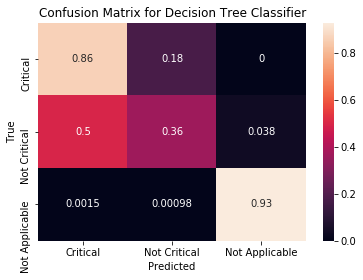

In [27]:
#Plotting the Confusion matrix

normal = cm / cm.astype(np.float).sum(axis=1) #Normalizing our Confusion Matrix as there are a wide range of values
ax= plt.subplot()
#Creating a heatmap using seaborn
sns.heatmap(normal, annot=True, ax = ax) #annot=True to annotate cells

#Setting labels, title and ticks
ax.set_xlabel('Predicted') #Axis label along X axis
ax.set_ylabel('True') #Axis label along Y axis
ax.set_title('Confusion Matrix for Decision Tree Classifier') 
ax.xaxis.set_ticklabels(labels) #Setting the sub-labels along X axis
ax.yaxis.set_ticklabels(labels) #Setting the sub-labels along Y axis

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>

Random Forest Classifier
</p>

In [28]:
#Using Random Forest Classifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train,y_train) #Fitting our splitted training data into our ML model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
rf_y = clf_rf.predict(X_test) #Predicting our test training data

In [30]:
rf_acc=accuracy_score(y_test,rf_y) #Checking the accuracy of our ML model
print('Random Forest Accuracy:',rf_acc)

Random Forest Accuracy: 0.644075645039


In [31]:
print('Random Forest Classification Report ')
print()
print(classification_report(y_test,rf_y)) #Printing the classification report to check the precision and recall values

Random Forest Classification Report 

                precision    recall  f1-score   support

      Critical       0.63      0.84      0.72     29706
Not Applicable       0.95      0.92      0.94       912
  Not Critical       0.66      0.38      0.48     23371

   avg / total       0.65      0.64      0.62     53989



In [32]:
print('Confusion matrix for Random Forest Classifier: ')
print()
labels = ['Critical', 'Not Critical', 'Not Applicable']
cm = confusion_matrix(y_test,rf_y, labels) #Finding the confusion matrix for a better idea of our predictions on our tested training data
print(cm)

Confusion matrix for Random Forest Classifier: 

[[25057  4647     2]
 [14459  8873    39]
 [   44    25   843]]


[Text(0,0.5,'Critical'),
 Text(0,1.5,'Not Critical'),
 Text(0,2.5,'Not Applicable')]

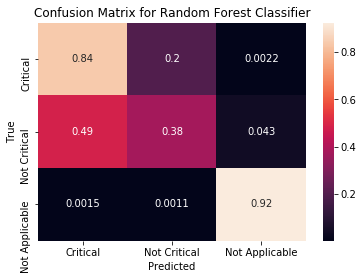

In [33]:
#Plotting the Confusion matrix

normal=cm / cm.astype(np.float).sum(axis=1)
#Normalizing our Confusion Matrix as there are a wide range of values
ax= plt.subplot()
#Creating a heatmap using seaborn
sns.heatmap(normal, annot=True, ax = ax) #annot=True to annotate cells

#Setting labels, title and ticks
ax.set_xlabel('Predicted') #Axis label along X axis
ax.set_ylabel('True') #Axis label along Y axis
ax.set_title('Confusion Matrix for Random Forest Classifier') 
ax.xaxis.set_ticklabels(labels) #Setting the sub-labels along X axis
ax.yaxis.set_ticklabels(labels) #Setting the sub-labels along Y axis

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold"><br>

XGBoost Classifier
</p>

In [34]:
#Using XGB classifier
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train,y_train) #Fitting our splitted training data into our ML model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [35]:
xgb_y = clf_xgb.predict(X_test) #Predicting our test training data

In [36]:
xgb_acc=accuracy_score(y_test,xgb_y) #Checking the accuracy of our ML model
print('XGB Accuracy:',xgb_acc)

XGB Accuracy: 0.659652892256


In [37]:
print('XGB Classification Report')
print()
print(classification_report(y_test,xgb_y)) #Printing the classification report to check the precision and recall values

XGB Classification Report

                precision    recall  f1-score   support

      Critical       0.64      0.90      0.74     29706
Not Applicable       0.96      0.91      0.93       912
  Not Critical       0.73      0.35      0.47     23371

   avg / total       0.68      0.66      0.63     53989



In [38]:
print('Confusion matrix for XGB Classifier: ')
print()
labels = ['Critical', 'Not Critical', 'Not Applicable']
cm = confusion_matrix(y_test,xgb_y, labels) #Finding the confusion matrix for a better idea of our predictions on our tested training data
print(cm)

Confusion matrix for XGB Classifier: 

[[26690  3016     0]
 [15240  8093    38]
 [   53    28   831]]


[Text(0,0.5,'Critical'),
 Text(0,1.5,'Not Critical'),
 Text(0,2.5,'Not Applicable')]

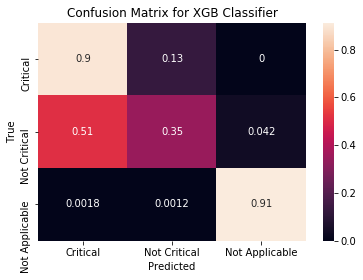

In [39]:
#Plotting the Confusion matrix

normal=cm / cm.astype(np.float).sum(axis=1)
#Normalizing our Confusion Matrix as there are a wide range of values
ax= plt.subplot()
#Creating a heatmap using seaborn
sns.heatmap(normal, annot=True, ax = ax) #annot=True to annotate cells

#Setting labels, title and ticks
ax.set_xlabel('Predicted') #Axis label along X axis
ax.set_ylabel('True') #Axis label along Y axis
ax.set_title('Confusion Matrix for XGB Classifier') 
ax.xaxis.set_ticklabels(labels) #Setting the sub-labels along X axis
ax.yaxis.set_ticklabels(labels) #Setting the sub-labels along Y axis

<p style="font-family: Arial; font-size:2.00em;color:#2462C0; font-style:bold"><br>

Checking the accuracy of the various classifiers 
</p>

In [40]:
clf_all=np.array([knn_acc, dt_acc,rf_acc, xgb_acc]) #Storing all the accuracies in a numpy array 

#Storing it in a dataframe for easier plotting
plot=pd.DataFrame(clf_all.reshape(clf_all.shape[0],1), columns=['Accuracy'], index=['KNN Classifier','Decision Tree Classifier','Random Forest Classifier',"XGB Classifier"])
plot.reset_index(level=0, inplace=True) #Reseting the index lables
plot=plot.rename(columns = {'index':'Classifier'}) #Changing column label of our first column from index to Classifier
plot

,Classifier,Accuracy
0,KNN Classifier,0.639816
1,Decision Tree Classifier,0.647613
2,Random Forest Classifier,0.644076
3,XGB Classifier,0.659653


<p style="font-family: Arial; font-size:2.00em;color:#2462C0; font-style:bold"><br>

Plotting a horizontal bar-graph to check the accuracy of the various classifiers
</p>

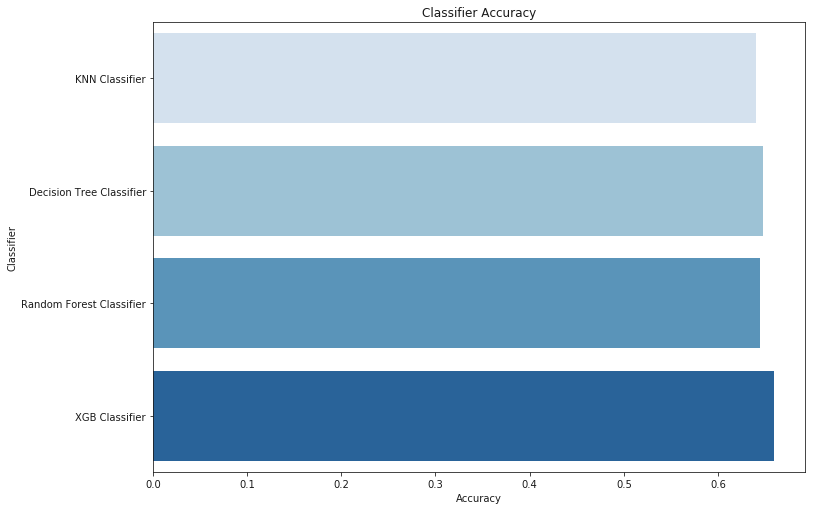

In [41]:
sns.set_color_codes("muted") 
#the dimensions of A4 size paper is (11.69*8.27)
fig, ax = plt.subplots(figsize=(11.69, 8.27)) #Creating the subplots for each classifier
#Plotting the subplots for each classifier with "Accuracy" along X-axis and "Classifier" along Y-axis
ax = sns.barplot(x="Accuracy", y="Classifier", data=plot, palette="Blues")
plt.title('Classifier Accuracy')
plt.show()

<p style="font-family: Arial; font-size:2.00em;color:#2462C0; font-style:bold"><br>

Training the entire "training data" using XGBoost Classifier
</p>

In [42]:
#Traning XGB classifier with whole training data
clf_xgb = XGBClassifier()
clf_xgb.fit(training_input,training_output)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

<p style="font-family: Arial; font-size:2.00em;color:#2462C0; font-style:bold"><br>

Predicting our "test data" using XGBoost Classifier
</p>

In [43]:
#Predicting for testing data (test.csv)
score_feature = get_score_feature(raw_data_test['SCORE'].tolist())
grade_feature = get_grade_feature(raw_data_test['GRADE'].tolist())
action_feature = get_action_feature(raw_data_test['ACTION'].tolist())
boro_feature = get_boro_feature(raw_data_test['BORO'].tolist())
inspection_type_feature = get_inspection_type_feature(raw_data_test['INSPECTION_TYPE'].tolist())
inspection_no_feature = get_inspection_no_feature(raw_data_test['INSPECTION NO.'].tolist())
ins_date = raw_data_test['INSPECTION DATE'].tolist()
grade_date = raw_data_test['GRADE DATE'].tolist()
record_date = raw_data_test['RECORD DATE'].tolist()
date_diff_feature = get_date_diff_feature(ins_date,grade_date,record_date)


In [44]:
#Creating a column stack to store all the features columnwise of our test input

test_input = score_feature
test_input = np.column_stack((test_input,grade_feature))
test_input = np.column_stack((test_input,action_feature))
test_input = np.column_stack((test_input,boro_feature))
test_input = np.column_stack((test_input,inspection_type_feature))
test_input = np.column_stack((test_input,inspection_no_feature))
test_input = np.column_stack((test_input,date_diff_feature))

In [45]:
test_prediction = clf_xgb.predict(test_input) #Predicting our results for "CRITICAL FLAG" of our test.csv file

In [46]:
camis = raw_data_test['CAMIS'].tolist() #Extracting the "CAMIS" (unique identifier for a restaurant) column and storing it in a list
final_output = zip(camis,test_prediction) #Zipping the "CAMIS" and "CRITICAL FLAG" together storing each entry in a tuple

<p style="font-family: Arial; font-size:2.00em;color:#2462C0; font-style:bold"><br>

Printing our test result with "CAMIS" and "Critical Flag" 
</p>

In [47]:
rows = []
for i,j in final_output: #Extracting each tuple entry
   print(i,",",j)
   x = [] #Empty list that stores the tuple of "CAMIS" and "CRITICAL FLAG"
   x.append(i)  
   x.append(j)
   rows.append(x) #Appending the pair of "CAMIS" and "CRITICAL FLAG" to the "rows" list

35773502 , Not Critical
92746946 , Not Critical
28205432 , Not Critical
53192030 , Not Critical
79547153 , Critical
19800370 , Not Critical
96776999 , Not Critical
15981237 , Critical
74882285 , Critical
34794232 , Critical
64406716 , Critical
26438331 , Not Critical
57428700 , Critical
98368927 , Critical
56338113 , Not Critical
47195976 , Not Critical
21687955 , Not Critical
68675402 , Not Critical
87417600 , Not Critical
26787352 , Critical
96876787 , Critical
23932316 , Not Critical
70071250 , Not Critical
77538216 , Not Applicable
36129325 , Critical
12226192 , Not Critical
36200392 , Not Critical
79825351 , Not Critical
69876914 , Not Critical
93938313 , Critical
50656584 , Critical
66608621 , Critical
58570370 , Critical
48936672 , Critical
59359649 , Critical
71819035 , Not Critical
46573344 , Not Applicable
44292286 , Not Critical
36210437 , Critical
83120886 , Not Critical
88995943 , Critical
69402694 , Not Critical
78132294 , Critical
87427549 , Critical
76169122 , Critical


50920234 , Critical
67699795 , Critical
46797076 , Critical
13199645 , Critical
16595619 , Critical
33657389 , Critical
86553243 , Critical
97781394 , Critical
53022737 , Not Critical
97699757 , Not Critical
62599358 , Not Critical
52446485 , Critical
37640559 , Critical
30894016 , Critical
66591587 , Critical
15382785 , Critical
80169083 , Not Critical
72746925 , Not Critical
45044775 , Critical
52302253 , Critical
72645755 , Not Critical
15928667 , Critical
92612399 , Critical
89283817 , Not Critical
50939555 , Not Critical
17834760 , Not Critical
15516362 , Not Critical
11732831 , Critical
80843117 , Not Critical
48098948 , Critical
92690654 , Not Critical
69289906 , Not Critical
19277044 , Not Critical
72863324 , Critical
96078799 , Not Critical
42084071 , Critical
55888222 , Not Critical
77067158 , Not Critical
39559668 , Not Critical
95391795 , Not Critical
44320905 , Critical
68421873 , Not Critical
78751894 , Not Critical
81671516 , Not Critical
95097432 , Not Critical
39261878

42484018 , Critical
40183820 , Critical
55484340 , Critical
23116751 , Critical
76612089 , Not Critical
56433396 , Not Critical
54813775 , Critical
17858229 , Critical
80679580 , Not Critical
54489644 , Critical
51032625 , Not Critical
30010408 , Critical
54305734 , Not Critical
26837959 , Not Critical
13189635 , Not Critical
75041682 , Critical
27423002 , Not Critical
59274605 , Not Critical
95086187 , Not Applicable
58648185 , Not Critical
50561990 , Critical
93947358 , Not Critical
79177053 , Not Critical
88028624 , Critical
75005017 , Not Critical
48987116 , Critical
76443448 , Critical
57888113 , Critical
88301434 , Not Critical
94196706 , Not Critical
45275699 , Critical
39722901 , Not Critical
86313479 , Critical
63234938 , Not Critical
90764495 , Critical
60342209 , Not Critical
32856405 , Critical
95438708 , Critical
32683986 , Critical
53037769 , Not Critical
14316452 , Critical
32839140 , Not Critical
80044674 , Not Critical
92866150 , Critical
16121558 , Critical
40945595 ,

96271027 , Not Critical
91153345 , Critical
63942316 , Not Critical
85593586 , Critical
23065548 , Not Critical
26486097 , Not Critical
99467571 , Critical
27517068 , Not Critical
40696303 , Critical
79133028 , Critical
64437875 , Not Critical
86839247 , Not Critical
73472418 , Critical
80918126 , Not Applicable
29163935 , Not Critical
83383729 , Not Critical
49206444 , Not Critical
72227285 , Critical
82564911 , Critical
39425269 , Not Critical
91758140 , Not Critical
46661271 , Critical
99765800 , Not Critical
54864537 , Not Critical
54264795 , Critical
62107428 , Not Critical
78992005 , Critical
13946163 , Not Critical
79411556 , Critical
95491023 , Critical
22194189 , Not Critical
86285254 , Not Critical
28445764 , Not Critical
12955365 , Critical
66300294 , Not Critical
98793268 , Not Critical
79970059 , Not Critical
84056407 , Critical
35349829 , Not Critical
66470722 , Critical
30482038 , Not Critical
82844226 , Not Critical
94324168 , Critical
63347016 , Critical
10957138 , Cri

50569569 , Critical
32531774 , Critical
37311582 , Not Critical
53015746 , Critical
69509133 , Not Critical
57408918 , Not Critical
42913586 , Critical
18825831 , Not Critical
18850382 , Not Critical
45692459 , Not Critical
28605049 , Not Critical
79472533 , Critical
52150327 , Critical
73005885 , Not Critical
97896857 , Critical
46267044 , Critical
19232577 , Critical
62225438 , Not Critical
25660811 , Critical
10179569 , Not Critical
74497014 , Not Critical
91172463 , Critical
30092338 , Not Critical
43204708 , Not Critical
61743832 , Critical
85031305 , Not Critical
57201622 , Not Critical
74292031 , Critical
19997692 , Critical
78041963 , Critical
28618212 , Critical
44165684 , Not Critical
75590757 , Critical
97932856 , Not Critical
41312002 , Not Critical
50997816 , Not Critical
65803722 , Not Critical
55939289 , Critical
73983131 , Critical
94450785 , Critical
87680814 , Critical
12016939 , Critical
86622319 , Not Critical
69434225 , Not Critical
57449121 , Not Critical
29598355

88317873 , Critical
39142217 , Critical
38300591 , Not Critical
59721170 , Not Applicable
98206898 , Not Critical
65485019 , Critical
25065700 , Not Critical
49461992 , Not Critical
81746584 , Not Critical
74195024 , Critical
97401975 , Not Critical
10978581 , Critical
98083577 , Critical
11077268 , Not Applicable
58573259 , Critical
56977450 , Not Critical
15307729 , Not Critical
67078372 , Critical
53235226 , Critical
69041829 , Not Critical
54589993 , Not Applicable
87041319 , Critical
26081762 , Not Critical
22921512 , Not Critical
58228704 , Not Critical
25107880 , Not Critical
59784495 , Critical
42901295 , Critical
52752511 , Not Critical
34275595 , Critical
45116657 , Not Applicable
74792793 , Critical
51219056 , Not Critical
62252445 , Critical
38927541 , Critical
76363443 , Critical
62414135 , Not Critical
61671672 , Critical
86944541 , Not Critical
10859602 , Not Critical
34474678 , Critical
81089665 , Critical
55005259 , Critical
95945009 , Critical
97848010 , Critical
2814

67216437 , Not Critical
56926745 , Critical
32599402 , Not Critical
38730528 , Not Critical
28398266 , Not Critical
66712521 , Critical
92091231 , Not Critical
44355939 , Not Critical
52830134 , Critical
55718209 , Critical
67694564 , Not Critical
88106300 , Critical
71639428 , Critical
32894485 , Not Critical
58516001 , Critical
80255851 , Critical
75639197 , Not Critical
68597569 , Not Critical
48996891 , Not Critical
82072680 , Not Critical
61978747 , Not Critical
58965413 , Not Critical
88352907 , Not Critical
51995382 , Not Critical
57360905 , Critical
70494146 , Not Critical
31379730 , Critical
93784017 , Not Critical
68700227 , Critical
19224061 , Critical
12294257 , Critical
11161229 , Critical
93478999 , Not Critical
30072061 , Not Critical
98505828 , Not Critical
43893739 , Critical
89852677 , Critical
34476264 , Not Critical
42391908 , Critical
88844571 , Not Critical
50806764 , Not Critical
97475236 , Not Critical
56963397 , Critical
77586641 , Not Critical
52384956 , Not C

50278859 , Not Critical
97839635 , Not Critical
10694277 , Not Critical
10147932 , Not Critical
88943587 , Critical
43446096 , Not Critical
47217149 , Critical
74239725 , Not Critical
29616762 , Not Critical
80583956 , Critical
57767217 , Not Critical
82280025 , Critical
89363373 , Critical
24246982 , Not Critical
58101000 , Critical
72327218 , Critical
38616513 , Critical
26221836 , Critical
92450565 , Critical
96026060 , Critical
64795738 , Not Critical
21429634 , Not Critical
83457839 , Not Critical
24660288 , Critical
47343078 , Critical
70986406 , Critical
50168683 , Not Critical
65546781 , Not Critical
12253258 , Not Critical
78474540 , Not Applicable
42021982 , Critical
73020369 , Critical
87723475 , Not Critical
80290687 , Not Critical
55950689 , Not Critical
91502086 , Not Critical
86022577 , Not Critical
59126622 , Not Critical
62188304 , Not Critical
88698029 , Not Critical
64818654 , Not Critical
92384208 , Critical
76952021 , Not Critical
18000335 , Critical
95709882 , Cri

48952857 , Not Critical
56605451 , Critical
17709052 , Critical
65188693 , Not Critical
14628321 , Not Critical
90921353 , Not Critical
12919090 , Not Critical
88256885 , Critical
97889143 , Critical
35503587 , Critical
36813020 , Not Critical
19892584 , Not Critical
89375896 , Critical
50868701 , Not Critical
53854235 , Critical
97801545 , Not Critical
81387893 , Critical
20790294 , Not Critical
91255461 , Not Critical
20458537 , Critical
43109851 , Critical
14159493 , Critical
49782385 , Not Critical
72177703 , Critical
16808851 , Not Critical
55911810 , Critical
94247996 , Not Critical
83211461 , Critical
68554991 , Not Critical
86193524 , Critical
81827567 , Not Critical
95094270 , Critical
39976844 , Not Critical
69720471 , Critical
56077796 , Critical
86793508 , Not Critical
29451518 , Critical
43470501 , Not Critical
70233719 , Not Critical
43862616 , Not Critical
95716568 , Critical
46443612 , Critical
13498631 , Not Critical
52611089 , Not Critical
47906067 , Critical
64624454

70519387 , Not Critical
44814250 , Not Critical
34159437 , Not Critical
32261946 , Not Critical
20516633 , Critical
16741435 , Not Critical
69403334 , Critical
59259557 , Critical
44589964 , Not Critical
17456798 , Not Critical
93255830 , Critical
91313981 , Critical
32202616 , Critical
94817398 , Not Critical
60966180 , Not Critical
54342148 , Not Critical
96436855 , Critical
32056387 , Critical
80521243 , Critical
53251844 , Not Critical
46974051 , Not Critical
54155296 , Not Critical
16153127 , Not Critical
47051932 , Critical
80611246 , Not Critical
80153140 , Not Critical
12441578 , Critical
17629728 , Critical
97577215 , Not Critical
98771739 , Not Critical
75193096 , Not Critical
53292501 , Not Critical
44430113 , Not Critical
71424478 , Critical
20448481 , Not Critical
42340595 , Not Critical
51522281 , Not Critical
79014924 , Not Critical
12592905 , Critical
23450329 , Not Critical
82635030 , Critical
15140057 , Not Critical
93421133 , Not Critical
58736100 , Not Critical
7961

17050626 , Not Applicable
21569525 , Not Critical
60889863 , Not Critical
39843813 , Not Critical
65293163 , Not Critical
38374246 , Not Critical
88353395 , Critical
25287190 , Not Critical
61651036 , Not Critical
94107588 , Critical
50492702 , Not Critical
10788565 , Not Critical
18466185 , Critical
19446518 , Critical
64315356 , Critical
31286455 , Not Critical
70799574 , Not Critical
68893686 , Not Critical
30027897 , Critical
17577468 , Not Critical
57479099 , Critical
48896634 , Critical
90616433 , Not Critical
63495216 , Not Critical
96008540 , Critical
62887512 , Not Critical
84245848 , Critical
94821182 , Critical
18330821 , Not Critical
74088027 , Critical
64531552 , Not Applicable
83549562 , Critical
55522711 , Critical
12499908 , Not Critical
33406249 , Not Critical
66603739 , Not Critical
16981945 , Critical
60625118 , Not Critical
77677316 , Not Critical
66579275 , Critical
56466291 , Not Applicable
16210412 , Not Critical
42357632 , Not Critical
34839598 , Not Critical
70

24439160 , Critical
97924363 , Not Critical
81067621 , Critical
45114335 , Not Critical
56224956 , Not Critical
80067471 , Not Critical
94238157 , Critical
74226203 , Critical
36268916 , Not Critical
88011796 , Critical
55774483 , Not Critical
90542949 , Not Critical
92389074 , Not Critical
89526129 , Critical
27793733 , Critical
85261010 , Not Critical
35911720 , Not Critical
38766534 , Not Critical
38291367 , Critical
68694098 , Critical
52515922 , Critical
25959418 , Critical
33101896 , Critical
38978749 , Critical
97426130 , Critical
75127698 , Not Critical
14384546 , Not Critical
66485604 , Not Critical
30721336 , Not Critical
17096979 , Not Critical
50422206 , Not Applicable
90777297 , Not Critical
92370906 , Critical
30001244 , Critical
94146180 , Critical
62841416 , Critical
85856303 , Critical
86693417 , Critical
87722319 , Not Critical
95064736 , Not Critical
71496938 , Critical
19421115 , Not Critical
75387709 , Not Critical
26790945 , Critical
82770773 , Not Critical
145734

90708224 , Not Critical
50474176 , Not Critical
59543391 , Critical
66692798 , Not Critical
62599184 , Critical
70066813 , Critical
61642492 , Not Critical
87344938 , Not Critical
39467016 , Critical
81918123 , Not Critical
64288579 , Critical
77451661 , Not Critical
28092386 , Not Critical
90965052 , Not Critical
82458238 , Not Critical
95836266 , Critical
43259228 , Critical
59231670 , Not Critical
81642243 , Not Critical
72105559 , Critical
22314150 , Not Critical
20742933 , Critical
81178649 , Not Critical
89338932 , Not Critical
18897499 , Not Critical
60210115 , Critical
32484792 , Not Critical
96268249 , Not Critical
32940254 , Critical
98358699 , Critical
78915512 , Critical
37663123 , Not Critical
37807177 , Not Critical
71930633 , Not Critical
60485224 , Not Critical
31779151 , Critical
45409570 , Critical
41832506 , Critical
14980160 , Critical
37752102 , Not Critical
45200158 , Critical
66597681 , Critical
36401286 , Not Critical
40878734 , Not Critical
10665322 , Not Criti

84177786 , Not Critical
11394177 , Critical
44507943 , Critical
44586126 , Critical
70163491 , Critical
80481435 , Not Critical
72049735 , Not Critical
11488022 , Not Critical
28672948 , Not Critical
25201831 , Critical
86626036 , Not Critical
72791375 , Not Critical
88979823 , Not Critical
85167733 , Not Critical
94282545 , Critical
40819301 , Not Critical
18004279 , Critical
42334293 , Not Critical
76342234 , Critical
98449874 , Not Critical
98745478 , Not Critical
49952393 , Not Critical
82399209 , Not Critical
80538022 , Critical
19660460 , Critical
51823532 , Critical
27797115 , Critical
20397812 , Not Critical
63705123 , Critical
79680457 , Not Critical
72230744 , Critical
33842534 , Critical
76028474 , Not Critical
85754177 , Not Critical
53234540 , Not Critical
98003847 , Not Critical
93130529 , Critical
48133057 , Not Critical
34922928 , Not Critical
34730925 , Critical
94445127 , Critical
16529804 , Critical
28698484 , Critical
64551764 , Critical
38476839 , Not Critical
2451

83126118 , Not Applicable
97049467 , Critical
23443944 , Not Critical
59287606 , Critical
90276498 , Not Critical
12896903 , Critical
94809486 , Critical
95371352 , Critical
51292507 , Critical
47102169 , Not Critical
89576902 , Critical
96793513 , Not Critical
98908227 , Not Critical
75836827 , Not Critical
57306644 , Critical
62449062 , Not Critical
13171760 , Not Critical
46380201 , Critical
38902206 , Not Critical
22176007 , Critical
74189187 , Critical
10318717 , Critical
72059366 , Not Critical
83467674 , Critical
93894116 , Not Critical
70284634 , Not Critical
85078845 , Not Critical
79623675 , Not Critical
74746115 , Critical
52888001 , Critical
72856136 , Critical
42437832 , Not Critical
34649761 , Critical
13527778 , Critical
12044745 , Critical
44594276 , Critical
13235495 , Not Critical
64435205 , Not Critical
50248542 , Not Critical
44390433 , Not Critical
88523595 , Not Critical
98167660 , Critical
98685546 , Not Critical
66053598 , Critical
77757924 , Critical
71104541 ,

61524201 , Not Critical
87722206 , Not Critical
50736248 , Critical
85316896 , Not Critical
59629577 , Not Critical
63340564 , Critical
96231924 , Not Critical
43235188 , Critical
70172783 , Not Critical
27811742 , Critical
77075300 , Not Critical
51788804 , Critical
59920807 , Not Critical
64790577 , Not Critical
46265417 , Critical
43795328 , Not Critical
43963198 , Critical
76744541 , Not Critical
33417218 , Not Critical
98968928 , Critical
58454962 , Critical
14689799 , Critical
24031520 , Not Critical
12154296 , Not Critical
32888156 , Not Critical
79445773 , Not Critical
15300371 , Not Critical
54653859 , Critical
37660536 , Not Critical
97078721 , Not Critical
75387684 , Not Critical
95953980 , Not Critical
39971095 , Critical
21808055 , Not Critical
70243551 , Critical
93886385 , Not Critical
41835165 , Critical
98834041 , Critical
65835916 , Critical
47784306 , Critical
86784668 , Critical
78905463 , Critical
37873754 , Critical
10954959 , Not Critical
35910327 , Not Critical


25544331 , Not Critical
91585051 , Not Critical
40895609 , Not Critical
53841590 , Critical
67417931 , Not Critical
12983232 , Not Critical
95317694 , Not Critical
16409147 , Critical
40343704 , Not Critical
76219821 , Critical
75048550 , Not Critical
58834744 , Not Critical
98009834 , Critical
72196134 , Critical
42450202 , Not Critical
48346463 , Not Critical
46362034 , Critical
99250895 , Critical
85518539 , Critical
14420133 , Critical
55814867 , Not Critical
59394051 , Not Critical
80894426 , Critical
23701531 , Not Critical
47331910 , Not Critical
46962596 , Not Critical
73077435 , Not Critical
47980178 , Critical
31914230 , Not Critical
20614386 , Not Critical
21304879 , Not Critical
44606645 , Critical
91907375 , Critical
59019940 , Not Critical
14983592 , Not Critical
53892490 , Not Critical
92994978 , Critical
70362737 , Not Critical
85921079 , Not Critical
51439187 , Not Critical
27357923 , Not Critical
67384053 , Not Critical
58795030 , Not Critical
48817857 , Not Critical


42022484 , Not Critical
45383510 , Critical
62817731 , Critical
57514946 , Not Critical
52146476 , Not Critical
48072102 , Not Critical
61339081 , Not Critical
49056123 , Critical
70035621 , Not Critical
88132541 , Critical
23155639 , Critical
39238876 , Not Critical
45368352 , Critical
30589312 , Not Critical
26600994 , Critical
87632639 , Critical
87321091 , Not Critical
19517571 , Not Critical
41462548 , Not Critical
77237438 , Critical
82987832 , Critical
54252744 , Not Critical
87625757 , Critical
28560112 , Not Critical
82820034 , Critical
48696222 , Critical
43395479 , Not Critical
66789955 , Not Critical
53287617 , Not Critical
58187692 , Not Critical
87799939 , Not Critical
82368482 , Critical
61618129 , Critical
74243769 , Critical
89195169 , Critical
85270597 , Not Critical
34195809 , Critical
68747581 , Not Critical
34878334 , Critical
17439064 , Critical
60631502 , Critical
39761586 , Critical
59109834 , Not Critical
47315365 , Not Critical
81817135 , Not Critical
94441757

78880874 , Not Critical
91022974 , Not Critical
12160568 , Critical
63150966 , Not Critical
72555083 , Critical
95949267 , Not Critical
23754039 , Critical
16401661 , Critical
38023467 , Critical
12687406 , Critical
51783314 , Not Critical
19197770 , Critical
82039242 , Not Critical
31542051 , Not Critical
64375801 , Not Critical
12070583 , Not Critical
35265028 , Critical
87903211 , Critical
50028856 , Not Critical
63189109 , Critical
27369388 , Not Critical
39877984 , Critical
66801495 , Not Critical
25510913 , Not Critical
65272681 , Critical
26663523 , Not Critical
12003929 , Critical
98071839 , Critical
25294018 , Critical
22608105 , Not Critical
87751333 , Not Critical
81444994 , Critical
79675223 , Critical
97133316 , Critical
69431321 , Critical
27111416 , Critical
44731311 , Critical
29824484 , Not Critical
71754384 , Critical
17140829 , Not Critical
25547658 , Not Critical
83262342 , Not Critical
91459403 , Not Critical
97869245 , Critical
47454608 , Not Critical
28182224 , N

16375221 , Critical
88062289 , Not Critical
22539734 , Critical
71963288 , Critical
53715686 , Critical
83340615 , Critical
84579149 , Critical
62988952 , Critical
45664430 , Critical
71910981 , Not Critical
81323285 , Critical
79679035 , Critical
95268983 , Critical
18463402 , Not Critical
63726850 , Critical
18190195 , Not Critical
38692663 , Not Critical
30996853 , Critical
92538461 , Not Critical
69487268 , Not Critical
52499520 , Not Applicable
10014412 , Not Critical
53154725 , Critical
91024398 , Critical
38352101 , Not Critical
53680946 , Not Critical
45522146 , Critical
35077564 , Critical
95440395 , Critical
16227885 , Not Critical
58426435 , Critical
19613199 , Critical
44321849 , Critical
38305432 , Not Critical
28741596 , Critical
59061276 , Not Critical
63182212 , Not Critical
80552893 , Not Critical
85622236 , Critical
72350747 , Not Critical
11591744 , Not Critical
60055652 , Not Critical
81741845 , Not Critical
59424736 , Not Critical
78011854 , Critical
85371423 , Not

78330218 , Not Critical
12768508 , Critical
42908116 , Not Applicable
80595459 , Not Critical
15918628 , Critical
39492191 , Not Critical
44164570 , Critical
23912737 , Critical
86558483 , Critical
88538100 , Critical
70290243 , Critical
58981338 , Critical
76864678 , Critical
99797791 , Critical
69883336 , Not Critical
72018640 , Critical
66426812 , Critical
36677371 , Critical
57128933 , Not Applicable
16594894 , Not Critical
31523937 , Not Critical
43798998 , Not Critical
22417458 , Critical
75877373 , Critical
36505991 , Not Critical
58282841 , Not Critical
57226191 , Not Critical
65499665 , Not Critical
17001825 , Not Critical
62254550 , Critical
28841028 , Critical
46202784 , Critical
72736457 , Not Applicable
33836125 , Critical
33846960 , Not Applicable
92509798 , Critical
96953852 , Critical
11901471 , Not Critical
73937543 , Critical
43293500 , Critical
35034907 , Critical
68123510 , Not Critical
95798162 , Not Critical
48898504 , Critical
65810888 , Not Critical
28323708 , N

17752583 , Critical
63359005 , Critical
51929787 , Critical
13991196 , Not Critical
50557878 , Not Critical
89807203 , Not Critical
52192319 , Critical
57919115 , Not Critical
87328599 , Not Critical
77439431 , Not Critical
41865693 , Not Critical
90802308 , Critical
10879251 , Critical
57609396 , Critical
36149252 , Not Critical
36900642 , Critical
27722282 , Critical
95346034 , Critical
74337812 , Not Critical
21145910 , Critical
66411180 , Critical
75000535 , Not Critical
27975372 , Critical
25139250 , Not Critical
41050107 , Not Critical
30660496 , Not Critical
64008001 , Not Critical
66229910 , Critical
28377346 , Critical
58648497 , Not Critical
58245011 , Critical
20257600 , Critical
16316304 , Critical
74415374 , Not Critical
83045137 , Critical
30010747 , Not Critical
90394229 , Not Critical
87290652 , Not Critical
32764296 , Critical
50103620 , Not Critical
49349798 , Not Critical
76555548 , Not Critical
81162202 , Critical
65846060 , Not Critical
81923179 , Not Critical
6871

58752582 , Critical
76816248 , Critical
96814942 , Not Critical
57861153 , Not Critical
37345325 , Not Critical
27861286 , Not Critical
64154430 , Not Critical
18231911 , Critical
90764993 , Critical
47644761 , Critical
45339263 , Not Critical
72687359 , Not Critical
20677029 , Critical
65595876 , Critical
34795858 , Not Critical
25489343 , Critical
61472912 , Critical
54324334 , Critical
48241067 , Not Critical
53388507 , Critical
80059091 , Not Critical
23194160 , Critical
62841453 , Critical
17321038 , Not Critical
14262033 , Critical
64218453 , Not Critical
39342346 , Critical
33926704 , Critical
82788426 , Not Applicable
87274709 , Not Critical
34711926 , Not Critical
25109087 , Critical
53576475 , Not Critical
76006982 , Critical
53557532 , Critical
90233509 , Critical
55419310 , Critical
89704089 , Critical
44859952 , Not Critical
53718964 , Not Critical
62881674 , Critical
65594233 , Critical
62033044 , Not Critical
11676044 , Critical
55838385 , Critical
36443181 , Not Critica

36240930 , Not Critical
89210022 , Not Critical
14471095 , Critical
92550272 , Critical
68885873 , Not Critical
78767215 , Not Critical
16044732 , Not Critical
64434453 , Critical
39262118 , Critical
77926339 , Not Critical
31051470 , Not Critical
35598845 , Not Critical
20454761 , Critical
92447057 , Not Critical
17430543 , Critical
30396260 , Not Critical
40738876 , Not Critical
78275336 , Critical
22270752 , Critical
69469814 , Not Critical
95345456 , Not Critical
84890554 , Not Critical
42549192 , Critical
37573123 , Critical
18667638 , Not Critical
93892547 , Not Critical
56015830 , Not Critical
71602528 , Critical
67375788 , Critical
17464850 , Critical
47960598 , Not Critical
21872550 , Not Critical
97253042 , Not Critical
14566366 , Not Applicable
36203407 , Not Critical
51780518 , Critical
34049624 , Not Critical
41508623 , Not Critical
58171857 , Critical
77034806 , Not Critical
25796947 , Critical
77833704 , Critical
15049144 , Not Critical
30769085 , Critical
13804185 , Not

64895747 , Not Critical
36762636 , Not Critical
19270467 , Not Critical
27622761 , Critical
46687725 , Not Critical
98858285 , Not Critical
99252736 , Not Critical
87416289 , Critical
97158336 , Critical
45866710 , Critical
65376817 , Not Critical
31302509 , Critical
51585590 , Not Critical
25261069 , Not Critical
23973401 , Not Critical
68456999 , Not Critical
58084996 , Critical
23013483 , Critical
61520934 , Critical
16472066 , Not Critical
71677069 , Not Critical
39062650 , Not Critical
52444452 , Not Applicable
65389815 , Not Critical
92982922 , Not Critical
41806999 , Not Critical
76238018 , Critical
50885198 , Not Critical
53939230 , Not Critical
50409996 , Critical
65646188 , Critical
17926207 , Critical
51797676 , Not Critical
68184856 , Critical
20552952 , Critical
83776230 , Not Critical
57037859 , Critical
66972224 , Not Critical
20011386 , Not Critical
35528902 , Critical
26288468 , Critical
28975647 , Not Critical
22457343 , Not Critical
15682468 , Critical
29071382 , Cri

37874495 , Not Critical
37455119 , Not Critical
66317643 , Not Critical
60631013 , Not Critical
67135142 , Critical
61710981 , Not Critical
59216624 , Critical
89730394 , Not Critical
68728566 , Critical
97257189 , Critical
25698773 , Not Critical
40881579 , Not Critical
37955719 , Critical
15150064 , Critical
44012393 , Critical
36809571 , Critical
61730483 , Not Critical
51902259 , Critical
80916705 , Critical
28976877 , Not Critical
69802766 , Critical
59896576 , Not Critical
34797013 , Not Critical
92884724 , Not Critical
33302433 , Not Critical
71029126 , Not Critical
15191653 , Not Critical
95250084 , Critical
37927343 , Critical
84439428 , Not Critical
79138856 , Not Critical
63394619 , Not Critical
37694040 , Not Applicable
87946440 , Critical
16917799 , Critical
94748946 , Not Critical
41222688 , Critical
99498711 , Critical
38857173 , Critical
31583528 , Not Critical
16611210 , Critical
97571337 , Not Critical
38561872 , Critical
94164594 , Not Critical
44463047 , Critical
75

33162721 , Not Critical
81574873 , Not Critical
39214150 , Not Critical
27158575 , Critical
30778257 , Not Critical
56719037 , Not Critical
55537682 , Not Critical
96891475 , Not Critical
28552105 , Not Critical
87996670 , Not Critical
60860225 , Not Critical
88919035 , Critical
42729384 , Critical
50450279 , Not Critical
34339530 , Not Critical
59778904 , Critical
27694937 , Not Applicable
29736645 , Not Critical
35489246 , Not Critical
30560825 , Critical
42906275 , Critical
78674531 , Not Critical
72014177 , Not Critical
16170797 , Critical
51065750 , Critical
93777193 , Not Critical
76635654 , Critical
62708668 , Critical
78698913 , Critical
78059538 , Not Critical
68365100 , Critical
47484996 , Critical
86257787 , Critical
66966839 , Critical
94143577 , Critical
56460263 , Not Critical
79975809 , Not Critical
42223287 , Critical
94024956 , Critical
61356568 , Not Critical
66755038 , Not Critical
53764049 , Not Critical
82245241 , Not Critical
36485227 , Not Critical
81744356 , Not

10234944 , Not Critical
53496385 , Not Critical
75344467 , Not Critical
56487276 , Critical
76704725 , Critical
36685505 , Critical
19782500 , Critical
56729410 , Not Critical
40135181 , Not Critical
41365095 , Not Critical
16725895 , Not Critical
44417739 , Not Critical
63731939 , Critical
12838452 , Not Critical
20546570 , Critical
55682096 , Critical
23839939 , Critical
92250756 , Critical
29505443 , Critical
85991219 , Critical
15398899 , Not Critical
14599179 , Not Critical
70784943 , Not Critical
34180472 , Not Critical
50827744 , Not Critical
67610660 , Not Critical
87808298 , Critical
80618348 , Not Critical
79044345 , Critical
26931347 , Critical
58356144 , Critical
53016828 , Critical
49472581 , Not Critical
28482614 , Critical
30782425 , Not Critical
12592406 , Critical
47210659 , Not Critical
73215254 , Critical
76630885 , Not Critical
79452574 , Not Critical
64229141 , Critical
48292839 , Critical
36762239 , Not Critical
67762892 , Not Critical
95702349 , Critical
40494216

57741132 , Critical
56235199 , Critical
19548727 , Not Critical
12175119 , Not Critical
33945192 , Critical
80568206 , Critical
66290633 , Not Applicable
32166302 , Critical
85437041 , Critical
70204097 , Critical
47878049 , Critical
11391995 , Not Critical
57397177 , Critical
27769626 , Not Critical
99059328 , Not Critical
77160833 , Critical
97685957 , Critical
44812910 , Critical
83460168 , Critical
75356398 , Not Critical
64837996 , Critical
64611089 , Critical
70881714 , Not Critical
18185783 , Not Critical
83385063 , Critical
22905959 , Critical
28254549 , Not Critical
52649542 , Not Critical
23538507 , Not Critical
48086445 , Not Critical
26190393 , Not Critical
56918846 , Not Critical
31759061 , Not Critical
47526670 , Not Critical
20058278 , Not Applicable
79886669 , Critical
20506559 , Critical
97367807 , Not Critical
24603358 , Not Critical
64302685 , Critical
41596143 , Not Critical
32481718 , Critical
56298174 , Not Critical
54615677 , Not Critical
61896719 , Not Critical


77901418 , Critical
13258101 , Critical
83797555 , Not Critical
95841839 , Not Critical
16222690 , Not Critical
82619268 , Critical
47844443 , Not Critical
70895752 , Not Critical
89786418 , Not Critical
51184440 , Not Critical
57206478 , Not Critical
63692678 , Critical
89987848 , Critical
46317958 , Critical
41662081 , Not Critical
66938691 , Not Critical
28907941 , Critical
67287961 , Not Critical
90146364 , Critical
86949115 , Critical
14848869 , Not Critical
26177037 , Critical
40476364 , Not Critical
87806199 , Critical
77897635 , Critical
32764212 , Critical
68417582 , Not Critical
70207590 , Critical
31049672 , Critical
55899393 , Not Critical
98644222 , Critical
98465501 , Not Critical
97688461 , Not Critical
14708620 , Not Critical
53029494 , Not Critical
81902078 , Critical
66547496 , Not Critical
93917323 , Not Critical
92673487 , Not Critical
21869773 , Critical
58698948 , Not Critical
54303068 , Critical
73996265 , Not Critical
30844358 , Critical
56156026 , Not Critical


58112576 , Critical
77908536 , Critical
61307575 , Critical
59375479 , Critical
52603363 , Not Critical
45385244 , Not Applicable
81198418 , Critical
80164869 , Critical
91099392 , Not Critical
91376023 , Not Critical
63058120 , Not Critical
16358719 , Not Critical
21553636 , Critical
86187438 , Critical
59302070 , Critical
54579952 , Not Critical
59446981 , Not Applicable
62033564 , Not Critical
76009242 , Critical
88043244 , Not Applicable
80638995 , Not Critical
49389769 , Not Critical
86003620 , Critical
71552632 , Not Critical
23315567 , Critical
62850997 , Critical
44294285 , Critical
97572652 , Not Critical
64319634 , Not Critical
39451459 , Not Critical
48745610 , Critical
20748081 , Critical
41408752 , Critical
43245352 , Not Critical
42477158 , Not Critical
49197079 , Not Critical
80594486 , Not Critical
35279918 , Critical
84543120 , Not Critical
15329295 , Critical
85232777 , Critical
79372889 , Critical
44037263 , Not Critical
78804833 , Critical
29572665 , Not Critical
25

76636656 , Not Critical
72868363 , Not Critical
81190851 , Critical
20162885 , Critical
39189467 , Critical
68221085 , Not Critical
92003382 , Not Critical
43202647 , Not Critical
26241064 , Critical
34904660 , Not Critical
56351103 , Not Critical
26150451 , Not Applicable
60590892 , Not Critical
99735314 , Not Critical
27207654 , Not Critical
88304758 , Critical
31722619 , Critical
18884931 , Not Critical
34485280 , Not Critical
13200801 , Critical
92915633 , Not Critical
30462829 , Critical
12030165 , Critical
65042073 , Critical
93102213 , Not Critical
56552073 , Not Critical
41589916 , Not Critical
10689798 , Not Critical
59672439 , Not Critical
69796512 , Not Critical
57051040 , Not Critical
70212375 , Critical
52975138 , Not Critical
99327221 , Not Critical
68127188 , Not Critical
35842799 , Not Critical
26388178 , Critical
28263114 , Not Critical
46270796 , Not Critical
42224286 , Not Critical
30290365 , Not Critical
85133641 , Not Applicable
59346524 , Not Critical
40463049 , N

72410590 , Critical
27979817 , Critical
56369509 , Critical
90902210 , Critical
88833210 , Not Critical
31921747 , Not Critical
34516234 , Not Critical
34864720 , Not Critical
10330893 , Not Critical
80264485 , Not Critical
92356309 , Critical
87734716 , Not Critical
42178333 , Not Critical
43900039 , Not Critical
28102863 , Not Critical
52008122 , Not Critical
61106314 , Not Critical
52554609 , Critical
80872893 , Critical
43518299 , Not Critical
62030799 , Critical
99186603 , Not Critical
52917439 , Not Critical
79723755 , Critical
98192134 , Critical
81955969 , Not Critical
29658670 , Critical
40922824 , Not Critical
26935387 , Critical
21029138 , Not Critical
52976096 , Not Critical
30101436 , Not Critical
80488049 , Critical
79741268 , Critical
40257132 , Not Critical
28206094 , Critical
52887844 , Critical
39660644 , Not Critical
61500227 , Critical
83635723 , Not Critical
71692096 , Critical
86974804 , Not Critical
19171797 , Not Critical
65802022 , Critical
78433579 , Not Criti

81522563 , Not Critical
34108668 , Critical
81754731 , Critical
73647668 , Critical
38955790 , Not Critical
97719052 , Not Critical
65509032 , Not Critical
24805272 , Critical
14073161 , Not Critical
96312263 , Critical
48342435 , Critical
77667442 , Not Critical
89572823 , Critical
57541864 , Critical
18249315 , Critical
68379794 , Not Critical
46378972 , Not Critical
10204882 , Critical
63731817 , Critical
21288326 , Critical
69069159 , Critical
25190621 , Not Critical
25012929 , Not Critical
64408930 , Not Critical
16959472 , Not Critical
55236903 , Not Critical
17333103 , Not Critical
83969782 , Critical
69898623 , Not Critical
42824422 , Not Critical
74171772 , Not Applicable
51762625 , Not Critical
44487080 , Not Critical
98446112 , Critical
94078530 , Critical
37773302 , Not Critical
38413717 , Not Critical
53507051 , Not Critical
44423335 , Critical
64504404 , Critical
33201629 , Not Critical
25834460 , Not Critical
92947567 , Not Critical
79593927 , Critical
79057174 , Not Cri

73579502 , Not Critical
46599776 , Critical
33972503 , Critical
16277818 , Critical
14369613 , Not Critical
64312343 , Critical
73982310 , Critical
92006948 , Not Critical
78711029 , Critical
37634120 , Critical
37834513 , Not Critical
60942166 , Critical
22840305 , Not Critical
86845600 , Critical
56382030 , Not Critical
60735436 , Critical
44030798 , Not Applicable
45152744 , Critical
83096722 , Critical
42790312 , Not Critical
17761502 , Critical
11530304 , Not Critical
89279925 , Not Critical
23217335 , Not Critical
42054568 , Not Critical
48392176 , Critical
36189688 , Critical
37938863 , Not Critical
44930324 , Critical
62075177 , Critical
43639532 , Not Critical
74654907 , Not Critical
94152438 , Critical
49088143 , Critical
79848997 , Not Critical
41044886 , Critical
46671396 , Not Critical
98225571 , Critical
65333149 , Not Critical
33581860 , Critical
83578193 , Critical
10360829 , Critical
38118421 , Critical
78231205 , Critical
64256440 , Not Critical
80384649 , Not Critica

22152635 , Critical
71326590 , Not Critical
26929728 , Critical
88928523 , Not Critical
24578143 , Not Critical
35103275 , Not Critical
75299615 , Critical
46882987 , Critical
50455482 , Critical
41036661 , Critical
30218847 , Not Critical
10237342 , Critical
81445420 , Not Critical
20794320 , Not Critical
88787360 , Not Critical
80335556 , Not Critical
61616846 , Critical
76221323 , Critical
63694795 , Critical
57701631 , Not Critical
21070539 , Critical
83011133 , Critical
67296743 , Critical
19744778 , Not Critical
29233614 , Not Critical
58255959 , Not Critical
11555112 , Not Critical
72707392 , Critical
94096339 , Critical
85933661 , Critical
14242481 , Critical
42518440 , Critical
92393523 , Not Critical
99902659 , Not Critical
41206652 , Critical
21930682 , Critical
30241748 , Critical
94526781 , Not Critical
62591816 , Not Critical
59844506 , Critical
61791882 , Not Critical
95106913 , Not Critical
55889920 , Critical
98104440 , Critical
45053567 , Critical
47926900 , Critical


65890495 , Not Critical
32742223 , Critical
44649359 , Critical
78037115 , Critical
61457543 , Critical
61012870 , Not Critical
68094872 , Critical
90440030 , Not Critical
87250530 , Not Critical
61742286 , Not Critical
63473172 , Not Critical
22863116 , Not Critical
62745823 , Not Critical
78965327 , Not Critical
98267717 , Not Critical
58361624 , Not Critical
94918429 , Critical
63619745 , Critical
59467869 , Critical
69858091 , Not Critical
31659390 , Not Critical
85940927 , Critical
60455063 , Critical
34021126 , Critical
74458451 , Critical
25224450 , Not Critical
72497096 , Not Critical
37330285 , Critical
54259535 , Not Critical
36881120 , Not Critical
75960787 , Critical
52040938 , Critical
31805054 , Critical
55406126 , Critical
94501890 , Critical
39546263 , Not Critical
39483563 , Critical
73583356 , Critical
65191724 , Not Critical
92419441 , Critical
90249940 , Not Critical
12659457 , Critical
17294825 , Critical
14985478 , Critical
31568775 , Not Critical
42358958 , Criti

35754941 , Not Critical
52198586 , Not Critical
55376310 , Not Critical
77400884 , Critical
29792871 , Critical
68770019 , Critical
68386859 , Critical
40747727 , Critical
64608956 , Critical
81460741 , Not Critical
97004540 , Critical
35075011 , Critical
12274327 , Critical
75246669 , Critical
31520153 , Not Critical
29665563 , Not Critical
69897036 , Not Critical
84541831 , Not Critical
63841012 , Not Critical
37241415 , Critical
76347302 , Not Critical
77328177 , Critical
64639045 , Not Critical
41302201 , Critical
67625509 , Critical
98202719 , Not Critical
38290482 , Not Critical
74401657 , Not Critical
28229899 , Critical
93101296 , Critical
24382290 , Not Critical
33958407 , Critical
62509469 , Critical
74974323 , Not Critical
44521411 , Not Critical
63695510 , Not Critical
28764957 , Critical
37653958 , Critical
73642686 , Not Critical
99019210 , Critical
54969870 , Critical
79938924 , Not Critical
90180124 , Critical
67490192 , Critical
40988782 , Not Critical
16745996 , Criti

33282885 , Critical
16807173 , Not Critical
26126452 , Not Critical
77217174 , Critical
92541403 , Critical
92790481 , Not Critical
25879260 , Not Critical
22211148 , Not Critical
44916710 , Not Critical
42730131 , Not Critical
18898362 , Critical
29373915 , Not Critical
89292202 , Critical
79988233 , Not Critical
78090592 , Not Critical
74463677 , Not Critical
32487686 , Not Critical
98344183 , Not Critical
82803233 , Critical
78593844 , Critical
32805957 , Critical
95230433 , Critical
63870909 , Not Critical
64530626 , Critical
59512386 , Not Critical
64565413 , Critical
20857680 , Not Critical
69552538 , Critical
27219488 , Not Critical
87611738 , Critical
46681539 , Not Critical
27897722 , Critical
79671590 , Critical
17498535 , Critical
98797262 , Critical
12262202 , Not Critical
82947799 , Not Critical
84810625 , Critical
22092744 , Critical
22472682 , Not Critical
82644768 , Not Critical
88680272 , Not Critical
85953898 , Critical
27744102 , Not Critical
79798854 , Not Critical


30236405 , Not Critical
39368186 , Critical
75745519 , Not Critical
80398988 , Not Critical
68495879 , Critical
66956836 , Critical
30084157 , Critical
75673712 , Critical
20783015 , Critical
49708322 , Critical
45121138 , Critical
45634704 , Critical
33737955 , Not Critical
90483746 , Critical
14686205 , Not Critical
79234774 , Not Critical
10346504 , Critical
80675636 , Not Critical
30288639 , Critical
63146997 , Not Critical
47403192 , Critical
69563722 , Not Critical
55082867 , Critical
55451424 , Critical
12406416 , Critical
39515603 , Critical
84086719 , Not Critical
60896314 , Not Critical
16615335 , Not Critical
90338333 , Critical
34363235 , Not Critical
27712685 , Critical
14498419 , Critical
55471008 , Not Critical
28053746 , Not Critical
72630860 , Not Critical
40674847 , Not Critical
41240720 , Not Critical
56022035 , Critical
94793651 , Critical
18964491 , Not Critical
15908357 , Not Critical
44364983 , Not Critical
13498031 , Critical
57617988 , Critical
35681902 , Not C

76255875 , Not Critical
20417987 , Critical
77693946 , Not Critical
98591222 , Not Critical
43252436 , Critical
41678342 , Critical
56293937 , Not Critical
72091264 , Not Applicable
71518385 , Critical
87200917 , Critical
28915092 , Not Critical
54651761 , Not Critical
22667584 , Critical
98383560 , Not Critical
57867720 , Not Critical
52400193 , Not Critical
82523810 , Not Critical
22473460 , Not Critical
54325427 , Critical
71757842 , Critical
21537732 , Not Critical
22063873 , Not Critical
41677551 , Critical
29059954 , Not Critical
37310308 , Critical
72694754 , Critical
89840773 , Critical
54215553 , Not Critical
51207127 , Not Critical
11046721 , Not Applicable
62422779 , Critical
65458784 , Not Critical
37985691 , Critical
87679756 , Not Critical
83880988 , Not Critical
51673541 , Critical
58440885 , Critical
90450366 , Critical
67712291 , Not Critical
47060501 , Critical
96332769 , Not Critical
26311512 , Not Critical
91887306 , Not Critical
78172703 , Not Critical
66896571 , N

47974979 , Not Critical
64356847 , Not Critical
99845716 , Critical
52030384 , Not Critical
63703060 , Critical
47047707 , Critical
14762297 , Critical
77732532 , Critical
65895821 , Not Critical
62954031 , Critical
70809484 , Critical
87259511 , Not Critical
40667543 , Not Critical
94184732 , Critical
17935793 , Not Critical
94950644 , Critical
27280093 , Not Critical
38135287 , Not Critical
33835968 , Not Critical
88809681 , Critical
65946501 , Critical
24885194 , Not Critical
45113012 , Critical
34025599 , Not Critical
98434517 , Not Critical
73891426 , Critical
13269373 , Not Critical
46630926 , Critical
28583067 , Not Critical
26306063 , Critical
14718039 , Not Critical
83349207 , Not Critical
21299697 , Critical
87525410 , Critical
34059756 , Critical
96459080 , Not Critical
42945408 , Critical
83320896 , Not Critical
42702477 , Not Critical
88122445 , Not Critical
42423609 , Critical
85898457 , Not Critical
69492734 , Critical
28268586 , Not Critical
37508221 , Critical
44363874

22133518 , Not Critical
31202465 , Not Critical
96553464 , Critical
65913283 , Critical
56258723 , Critical
37892626 , Not Critical
63446840 , Critical
60257293 , Not Critical
62941369 , Critical
68072630 , Not Critical
60136875 , Critical
25062389 , Not Critical
54840965 , Critical
86875348 , Critical
69433164 , Critical
19352018 , Not Critical
18599652 , Critical
78617801 , Critical
18721989 , Critical
53128985 , Not Critical
85277284 , Not Critical
21205959 , Not Critical
23223997 , Critical
35580082 , Critical
47857326 , Not Critical
82191634 , Not Critical
72927103 , Critical
76414456 , Not Critical
57922077 , Not Critical
30022070 , Critical
94985367 , Not Critical
64261213 , Critical
96799484 , Not Critical
10771131 , Critical
99869918 , Critical
51039669 , Critical
10802526 , Not Critical
68944321 , Critical
35549528 , Not Critical
97042634 , Not Critical
74858855 , Critical
60101817 , Critical
45803190 , Not Critical
86689367 , Not Critical
10023627 , Not Critical
24536376 , N

15699270 , Not Critical
55464182 , Not Critical
18327362 , Not Critical
51690081 , Not Critical
37771189 , Critical
65526881 , Not Critical
41050689 , Not Critical
25557505 , Critical
20681366 , Critical
87353024 , Not Applicable
99412694 , Critical
59708324 , Not Critical
50022560 , Critical
39083398 , Not Critical
28641159 , Critical
43996606 , Critical
24915157 , Not Critical
88243895 , Not Critical
32594782 , Critical
10240841 , Not Critical
94618519 , Not Critical
65079703 , Critical
80444785 , Not Critical
44493548 , Not Critical
92091506 , Not Critical
54404007 , Not Critical
86190919 , Critical
95470479 , Not Critical
43359938 , Critical
40193899 , Critical
23918763 , Not Critical
80881240 , Critical
59525932 , Not Critical
36024383 , Not Critical
52875246 , Not Critical
45900412 , Not Critical
52704328 , Not Critical
48728295 , Not Critical
71229762 , Critical
24297005 , Not Critical
54663952 , Critical
18072003 , Critical
75373734 , Critical
99675961 , Critical
70449811 , Not

78099596 , Critical
49643532 , Not Critical
10771070 , Critical
48189978 , Critical
94674196 , Critical
81025219 , Critical
88831433 , Critical
65579624 , Critical
55954996 , Not Critical
38358927 , Critical
95548294 , Critical
27863377 , Not Critical
28985991 , Critical
73463193 , Critical
28392430 , Not Critical
41356566 , Critical
83992494 , Not Critical
47015947 , Critical
71306120 , Not Critical
49636912 , Critical
20997874 , Not Critical
70307980 , Critical
40777104 , Not Critical
57394131 , Critical
19426370 , Critical
86393170 , Critical
26851411 , Not Critical
38447410 , Not Critical
10889960 , Not Critical
44831380 , Not Critical
16133965 , Critical
41701051 , Not Critical
18638475 , Not Critical
77018372 , Critical
27638457 , Not Critical
86177986 , Not Critical
22395539 , Not Critical
23797991 , Not Critical
80899721 , Not Critical
70923521 , Not Critical
32250070 , Critical
69083887 , Not Critical
80680348 , Critical
23327119 , Critical
58679840 , Critical
27423628 , Not C

49509499 , Not Critical
28914640 , Not Critical
70996131 , Critical
92301142 , Critical
64640307 , Not Critical
56186544 , Not Critical
60741058 , Critical
48749719 , Critical
72983390 , Critical
65400441 , Not Critical
20530372 , Not Critical
32808053 , Critical
21982850 , Not Critical
42789419 , Not Critical
76300708 , Critical
62295824 , Critical
86541063 , Not Critical
44273155 , Not Critical
59876624 , Critical
33548551 , Not Critical
59224234 , Not Critical
83973186 , Not Critical
25008731 , Critical
90710329 , Not Critical
63048037 , Not Critical
60830003 , Not Critical
42599570 , Not Critical
40814705 , Critical
21971803 , Not Critical
28216068 , Not Critical
56960019 , Not Critical
90954062 , Critical
93484068 , Not Critical
70411830 , Not Critical
89312716 , Critical
81621420 , Not Critical
33539677 , Not Critical
67509136 , Not Critical
44057799 , Not Critical
72167146 , Critical
67012852 , Critical
98546217 , Not Critical
87914347 , Critical
53888341 , Critical
32346328 , N

50320443 , Critical
72638855 , Not Critical
44605495 , Not Critical
15333113 , Critical
25525492 , Not Critical
24599386 , Critical
87027164 , Not Critical
88163737 , Not Critical
28540933 , Not Critical
60510601 , Critical
19969980 , Critical
26121592 , Not Applicable
80770118 , Not Critical
90639701 , Not Critical
44378706 , Critical
29790954 , Critical
93346197 , Critical
83486085 , Critical
34652445 , Not Critical
26045571 , Critical
42802844 , Not Critical
71398966 , Not Critical
91736256 , Not Critical
48616133 , Not Critical
60950910 , Not Critical
29688117 , Not Applicable
68555257 , Not Critical
71567517 , Not Critical
59727122 , Not Critical
41161239 , Critical
71138463 , Not Critical
91833745 , Not Critical
74423864 , Not Critical
69593120 , Not Critical
80840218 , Critical
65935120 , Not Applicable
26273905 , Not Critical
83024969 , Not Critical
61888698 , Not Applicable
87853478 , Critical
95190765 , Not Critical
25764458 , Not Critical
21633985 , Not Critical
74176778 , C

<p style="font-family: Arial; font-size:2.00em;color:#2462C0; font-style:bold"><br>

Creating our CSV file 
</p>

In [48]:
import csv 
fields = ['CAMIS','Critical Flag']
with open('sample submission.csv','w') as csvfile: #Writing our result in a csv file
       csvwriter = csv.writer(csvfile)
       csvwriter.writerow(fields) #Writing the first row with the column indices "CAMIS" and "CRITICAL FLAG"
       for row in rows:
           csvwriter.writerow(row) #Writing the rest consecutive rows with the row values stored in "rows" list